# multi-class 클래스가 2개보다 많을 때
클래스 2개 초과인 경우
- 이진 분류(클래스가 2개일 때)에서는 타겟(찾고 싶은 y)만 찾으려고 했다.
- x feed, > model(x) = x의 클래스가 1일 확률, x가 클래스 0일 확률 = 1-p(x,y=1)
- 클래스 k = 3개다.
- model(x) = x가 클래스 0일 확률, x가 클래스 1일 확률, x가 클래스 2일 확률

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [3]:
np.exp(0), np.exp(1), np.exp(2) # exponencial 지수 함수

(1.0, 2.7182818284590451, 7.3890560989306504)

In [4]:
np.exp(-1), np.exp(-2), np.exp(-3)

(0.36787944117144233, 0.1353352832366127, 0.049787068367863944)

In [6]:
np.set_printoptions(6, suppress=True)
y = [0, 1]
# h = WX + b
# y = sigmoid(h)
h = np.array([-10, 10])
sigmoid(h)

array([ 0.000045,  0.999955])

In [7]:
# 클래스 3개가 존재할 때 한 샘플에 대해서 다음과 같은 예측이 나왔습니다
h = np.array([[2.0, 1.0, 0.1]]) # 한 샘플에 대한 예측값을 확률로 바꾸자
norm = h / np.sum(h)
norm

array([[ 0.645161,  0.322581,  0.032258]])

In [8]:
h_e = np.exp(h)
h, h_e

(array([[ 2. ,  1. ,  0.1]]), array([[ 7.389056,  2.718282,  1.105171]]))

In [9]:
softmax = h_e/np.sum(h_e)
softmax

array([[ 0.659001,  0.242433,  0.098566]])

붓꽃 데이터 전부를 학습시켜 봅시다

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [12]:
x, y = load_iris(True)
x.shape, y.shape, set(y)

((150, 4), (150,), {0, 1, 2})

In [13]:
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))

In [31]:
model = MLPClassifier(max_iter=690).fit(x_norm, y)
model.score(x_norm, y) # accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.97999999999999998

In [40]:
model = LogisticRegression(max_iter=690).fit(x, y)
model.score(x, y)

0.95999999999999996

In [46]:
model.coef_, model.intercept_

(array([[ 0.414988,  1.461297, -2.262141, -1.029095],
        [ 0.41664 , -1.600833,  0.577658, -1.385538],
        [-1.707525, -1.534268,  2.470972,  2.555382]]),
 array([ 0.265606,  1.085424, -1.214715]))

In [44]:
x0 = x[0]
y0 = y[0]
x0, y0

(array([ 5.1,  3.5,  1.4,  0.2]), 0)

In [48]:
# y = WX + b
h = np.sum(model.coef_ * x0, axis=1) + model.intercept_
h

array([  4.123771,  -1.861017, -11.322595])

In [50]:
# 보기 불편하니까 확률로 바꿔보자
h_e = np.exp(h)
h_e / np.sum(h_e)

array([ 0.997489,  0.00251 ,  0.      ])

In [2]:
from sklearn.datasets import load_digits

In [3]:
x, y = load_digits(return_X_y=True)
x.shape, y.shape

((1797, 64), (1797,))

학습용:테스트용 50:50으로 나눠서 학습용으로만 학습, 테스트셋 성능을 측정해보세요

In [69]:
index = len(x) // 2
train_x, test_x = x[:index], x[index:]
train_y, test_y = y[:index], y[index:]
index

898

In [53]:
# 히든 레이어를 디자인할 수 있습니다.
model = MLPClassifier(hidden_layer_sizes=(280,280,128), max_iter=1000 ,random_state=2020)
model.fit(train_x, train_y)
model.score(train_x, train_y), model.score(test_x, test_y)

(1.0, 0.95105672969966626)

In [6]:
x0 = x[0]
x0, y[0]

(array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]), 0)

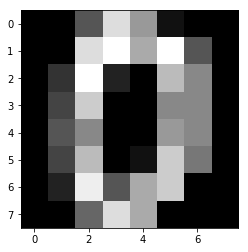

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x[0].reshape((8,8)), cmap='gray')

In [54]:
x0 = x[0].reshape((8,8))
x1 = x[1].reshape((8,8))
x2 = np.concatenate((x0, x1), axis=1)
x0.shape, x1.shape, x2.shape

((8, 8), (8, 8), (8, 16))

In [89]:
# 데이터 2개 준비
x0 = np.concatenate((x[0].reshape((8,8)), x[1].reshape((8,8))), axis=1)
x1 = np.concatenate((x[2].reshape((8,8)), x[3].reshape((8,8))), axis=1)
y0 = y[:2]
y1 = y[2:4]

In [83]:
x0 = np.reshape(x0, [-1])
x1 = np.reshape(x1, [-1])
x_train = np.stack((x0, x1), 0)
y_train = np.stack((y0, y1), 0)
x_train.shape, y_train.shape

((2, 128), (2, 2))

In [90]:
x0, np.reshape(x0, [-1])

(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,   0.,
          12.,  13.,   5.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.,   0.,   0.,   0.,
          11.,  16.,   9.,   0.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.,   0.,   0.,   3.,
          15.,  16.,   6.,   0.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,   7.,  15.,
          16.,  16.,   2.,   0.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   0.,   1.,
          16.,  16.,   3.,   0.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.,   0.,   0.,   1.,
          16.,  16.,   6.,   0.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.,   0.,   0.,   1.,
          16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,
          11.,  16.,  10.,   0.,   0.]]),
 array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,   0.,
    

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
model = MultiOutputClassifier(MLPClassifier()).fit(x_train, y_train)
model.predict(x_train), model.score(x_train, y_train)

(array([[0, 1],
        [2, 3]]), 1.0)

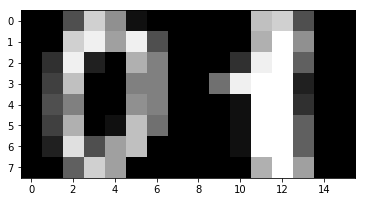

In [66]:
plt.imshow(x0.reshape((8,16)), cmap='gray')

In [76]:
data = list()
data.append(x0.tolist())

In [77]:
data.append(x1.tolist())

In [78]:
data

[[0.0,
  0.0,
  5.0,
  13.0,
  9.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  13.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.0,
  15.0,
  10.0,
  15.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  11.0,
  16.0,
  9.0,
  0.0,
  0.0,
  0.0,
  3.0,
  15.0,
  2.0,
  0.0,
  11.0,
  8.0,
  0.0,
  0.0,
  0.0,
  3.0,
  15.0,
  16.0,
  6.0,
  0.0,
  0.0,
  0.0,
  4.0,
  12.0,
  0.0,
  0.0,
  8.0,
  8.0,
  0.0,
  0.0,
  7.0,
  15.0,
  16.0,
  16.0,
  2.0,
  0.0,
  0.0,
  0.0,
  5.0,
  8.0,
  0.0,
  0.0,
  9.0,
  8.0,
  0.0,
  0.0,
  0.0,
  1.0,
  16.0,
  16.0,
  3.0,
  0.0,
  0.0,
  0.0,
  4.0,
  11.0,
  0.0,
  1.0,
  12.0,
  7.0,
  0.0,
  0.0,
  0.0,
  1.0,
  16.0,
  16.0,
  6.0,
  0.0,
  0.0,
  0.0,
  2.0,
  14.0,
  5.0,
  10.0,
  12.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  16.0,
  16.0,
  6.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  13.0,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  11.0,
  16.0,
  10.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  4.0,
  15.0,
  12.0,
  0.0,
  0.0,
  0.0,
  0.0

In [81]:
data = np.array(data)

In [84]:
data.shape, x_train.shape

((2, 128), (2, 128))

In [86]:
y0, y_train

(array([0, 1]), array([[0, 1],
        [2, 3]]))

In [87]:
[y[0],y[1]]

[0, 1]

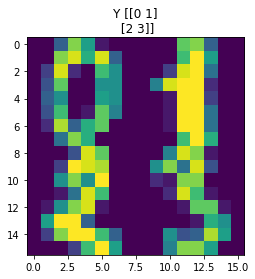

In [88]:
plt.title('Y ' + str(y_train))
plt.imshow(x_train.reshape((-1,16)))